Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


importing the datset


In [ ]:
data = pd.read_csv("Data.csv")
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,313000,3,1.50,1340,7912,1340,0
1,2384000,5,2.50,3650,9050,3370,280
2,342000,3,2.00,1930,11947,1930,0
3,420000,3,2.25,2000,8030,1000,1000
4,550000,4,2.50,1940,10500,1140,800
...,...,...,...,...,...,...,...
694,625000,4,2.75,1680,11180,1680,0
695,707000,4,3.25,3200,7081,3200,0
696,950000,4,2.50,3320,7644,3320,0
697,420000,4,2.50,3040,24123,3040,0


In [ ]:
dataframe = pd.DataFrame(data)
dataframe


,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,313000,3,1.50,1340,7912,1340,0
1,2384000,5,2.50,3650,9050,3370,280
2,342000,3,2.00,1930,11947,1930,0
3,420000,3,2.25,2000,8030,1000,1000
4,550000,4,2.50,1940,10500,1140,800
...,...,...,...,...,...,...,...
694,625000,4,2.75,1680,11180,1680,0
695,707000,4,3.25,3200,7081,3200,0
696,950000,4,2.50,3320,7644,3320,0
697,420000,4,2.50,3040,24123,3040,0


First 5 rows


In [ ]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,313000,3,1.50,1340,7912,1340,0
1,2384000,5,2.50,3650,9050,3370,280
2,342000,3,2.00,1930,11947,1930,0
3,420000,3,2.25,2000,8030,1000,1000
4,550000,4,2.50,1940,10500,1140,800


checking the no. of rows and colulmns

In [ ]:
data.shape

(699, 7)

In [ ]:
#Checking for missing values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

In [ ]:
#Statistical measures of our data
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,5.556552e+05,3.427754,2.153433,2130.137339,15886.519313,1805.532189,324.605150
std,3.409871e+05,0.927996,0.796533,1004.158446,34883.827697,879.515922,464.667964
min,9.000000e+04,1.000000,0.750000,650.000000,681.000000,650.000000,0.000000
25%,3.350000e+05,3.000000,1.750000,1440.000000,5167.500000,1170.000000,0.000000
50%,4.900000e+05,3.000000,2.250000,1960.000000,7685.000000,1560.000000,0.000000
75%,6.500000e+05,4.000000,2.500000,2600.000000,11133.500000,2220.000000,650.000000
max,3.200000e+06,9.000000,8.000000,13540.000000,435600.000000,9410.000000,4130.000000


Understanding the correlation of data
1. Positive
2. Negative

<Axes: >

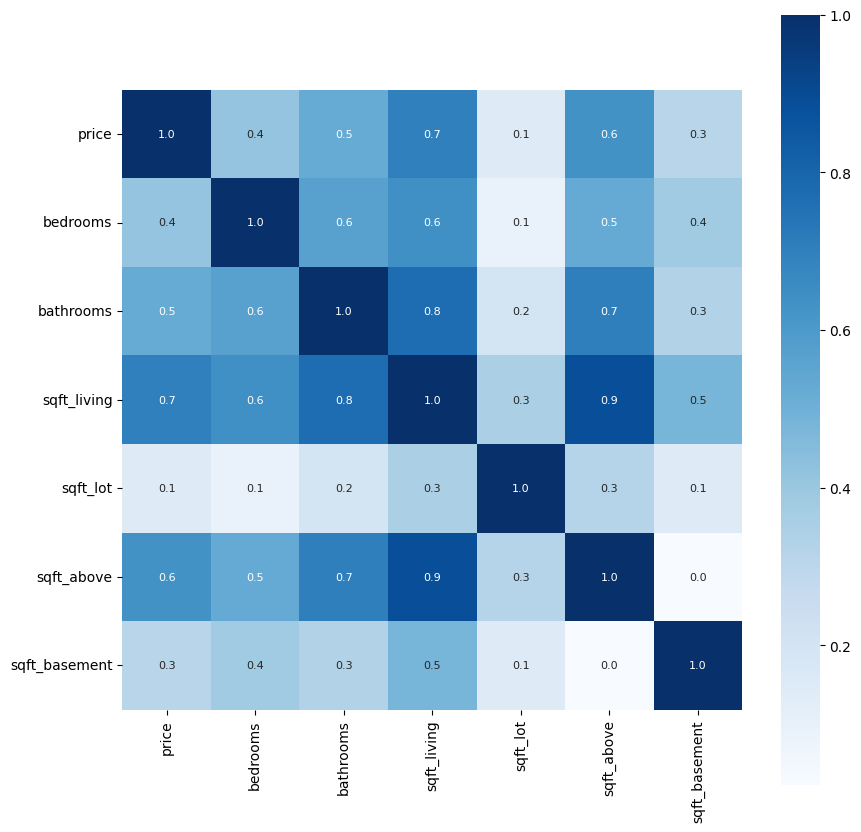

In [ ]:
Correlation = data.corr()

# COnstructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sb.heatmap(Correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#splitting the data and target
X=data.drop(['price'],axis=1)
Y=data['price']

print(X)
print(Y)

     bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement
0           3       1.50         1340      7912        1340              0
1           5       2.50         3650      9050        3370            280
2           3       2.00         1930     11947        1930              0
3           3       2.25         2000      8030        1000           1000
4           4       2.50         1940     10500        1140            800
..        ...        ...          ...       ...         ...            ...
694         4       2.75         1680     11180        1680              0
695         4       3.25         3200      7081        3200              0
696         4       2.50         3320      7644        3320              0
697         4       2.50         3040     24123        3040              0
698         4       2.75         2270      7375        1290            980

[699 rows x 6 columns]
0       313000
1      2384000
2       342000
3       420000
4       550000
 

In [ ]:
#Splitting the datas into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(699, 6) (559, 6) (140, 6)
(699,) (559,) (140,)


Model Training(Using xgboost regressor)



In [ ]:
#loading the model
model = XGBRegressor()

#training model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

prediction on training data

In [ ]:
#accuracy for prediction on training data
training_data_pred = model.predict(X_train)
print(training_data_pred)

[ 372684.97   551234.5    446698.47   376346.78  1234785.4    394049.75
  909135.     771144.25   376466.     326103.22   428490.66   342720.7
  699348.75   152097.08   577320.44   267450.75  1108461.4    896271.1
  548463.     568720.75   350622.97   563362.7    253346.05   440200.66
  185751.06   402746.1    229333.27   416750.78   600144.06   477784.66
  340964.97   987963.25   570338.3    579880.2    500692.56   723080.7
  632419.8    259066.98   633733.56   569110.7    503732.9    296756.44
  323470.44   979204.7    513482.28   441890.9   1040437.4    274752.97
  623260.5    572282.5    277163.7    391162.78   464027.53   255134.97
  362440.38   280509.     501766.53   395364.78   446547.62   424924.28
  304361.16   538538.7    596607.6    292551.4    280112.6    279969.3
  486054.1   1105001.5    168433.33   957662.1    375845.56  1230372.1
  375922.9    493375.53   365631.62   806603.     379052.7    348100.28
  717178.75   378185.     549005.1    218298.89   668920.75   399460.

In [ ]:
#Error for training data
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_pred)




print("R squared error:", score_1)


R squared error: 0.997074993251354


In [ ]:
#prediction on testing data
test_data_pred = model.predict(X_test)

#error value for test data
# R squared error
score_2 = metrics.r2_score(Y_test, test_data_pred)



print("R squared error:", score_2)

164250.6979910714
R squared error: 0.3689342910608846


Visualizing the actual and predicted prices

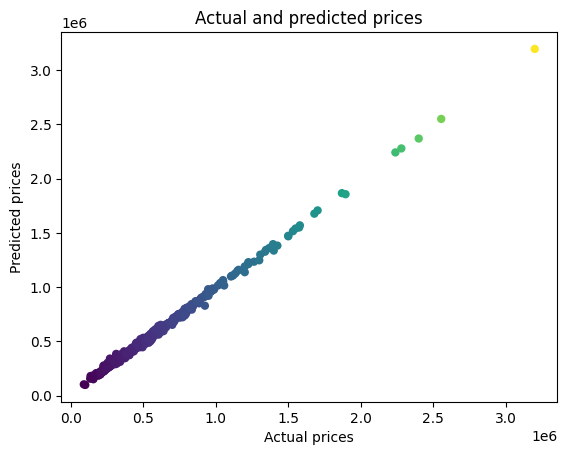

In [ ]:
plt.scatter(Y_train,training_data_pred,c=Y_train,linewidth=0.001)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual and predicted prices")
plt.show()